# ベンチマーク関数 標準誤差機能 の使い方
ベンチマーク関数に追加した標準誤差機能の使い方を解説します。  

<a href="https://colab.research.google.com/github/" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ライブラリのインストール、モデルの準備
OpenJij のリポジトリから Fork した自分のリポジトリ内に、さらに feature/error_bar リポジトリを branch しました。
標準誤差関数が実装されるまでは、自分のGitHubから、 OpenJij をインストールして、実行ができます。  

反強磁性1次元イジングモデルの準備

In [ ]:
#!pip install -U cmake
#!pip install git+https://github.com/kumagaimasahito/OpenJij.git@feature/error_bar

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import openjij as oj

# 反強磁性1次元イジングモデル を作る
N = 30
h = {0: -10}
J = {(i, i+1): 1 for i in range(N-1)}

## ベンチマーク関数
呼び出し方は、今まで通りです。

引数に変化はありません。  
返り値として、以下の計算結果が新たに辞書型で格納されるようにしました。  

- se_success_prob: 成功確率の標準誤差のリスト  
      iteration 回アニーリング時、成功確率の期待値の標準偏差  
      step_num ごとに、格納されている

- se_residual_energy: 残留エネルギーの標準誤差のリスト  
      iteration 回アニーリング時の、残留エネルギー値の平均の標準偏差  
      step_num ごとに、格納されている

- se_lower_tts: TTSの下位誤差のリスト
      成功確率の上位誤差を基に算出したTTSの下位誤差

- se_upper_tts: TTSの上位誤差のリスト
      成功確率の下位誤差を基に算出したTTSの下位誤差

In [2]:
# 最適解
correct_state = [(-1)**i for i in range(N)]

# ステップ数とアニーリングの反復数を与えます
step_num_list = list(range(10, 101, 10))  # [10, 20,,,, 100]
iteration = 100

# benchmark 関数で TTS 残留エネルギー 成功確率 標本平均 標準誤差を計算
sampler = oj.SASampler(num_reads=iteration)
result = oj.solver_benchmark(
                      solver=lambda time, **args: sampler.sample_ising(h,J,num_sweeps=time), 
                      time_list=step_num_list, solutions=[correct_state], p_r=0.99
            )

In [3]:
# seaborn を使うとグラフが見やすくなる
# !pip install seaborn
import seaborn as sns
sns.set()

/usr/local/miniconda3/envs/openjij3/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


### TTS 残留エネルギー 成功確率
TTS 残留エネルギー 成功確率 の可視化は今まで通りできます。

Text(0, 0.5, 'Success probability')

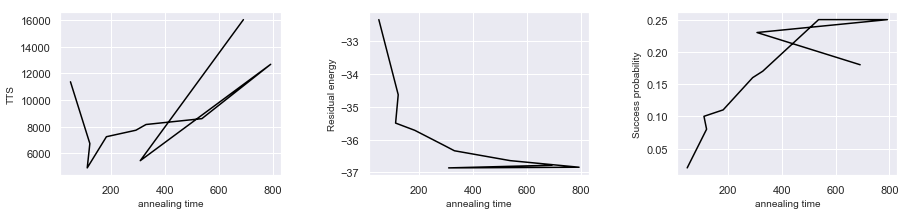

In [8]:
fig, (axL,axC,axR) = plt.subplots(ncols=3, figsize=(15,3))
plt.subplots_adjust(wspace=0.4)

fontsize = 10
axL.plot(result['time'], result['tts'], color = 'black')
axL.set_xlabel('annealing time', fontsize=fontsize)
axL.set_ylabel('TTS', fontsize=fontsize)

axC.plot(result['time'], result['residual_energy'], color = 'black')
axC.set_xlabel('annealing time', fontsize=fontsize)
axC.set_ylabel('Residual energy', fontsize=fontsize)

axR.plot(result['time'], result['success_prob'], color = 'black')
axR.set_xlabel('annealing time', fontsize=fontsize)
axR.set_ylabel('Success probability', fontsize=fontsize)

### 標準誤差
標準誤差は、se_success_probとse_residual_energyに格納されています。  
これらを使えば、標準誤差のエラーバーを表示できます。

In [9]:
# 標準誤差の確認
print(result['se_upper_tts'])
print(result['se_lower_tts'])
print(result['se_residual_energy'])
print(result['se_success_prob'])

[13388.196321142404, 9911.102719950344, 7710.473222454254, 11779.439837899115, 14848.876789318652, 16224.713930223505, 23163.040767149592, 34171.31829135721, 13500.864960678293, 33035.50440761748]
[10060.731171089232, 5437.479680351055, 3893.4360537639604, 5714.889476543427, 5937.451546843923, 6243.406315991658, 6459.91006968379, 9529.994155075381, 4097.1222783392495, 12231.748228729884]
[2.7689475811345194, 2.280882338575193, 2.0175993335414915, 2.060106891411318, 1.9508092079074686, 1.8214213564070665, 1.8063859784194247, 1.6497321484459715, 1.639290312077982, 1.50137983673067]
[0.14070529413628965, 0.27265992434429076, 0.30151134457776363, 0.31446603773522014, 0.3684529491774706, 0.3775251680686369, 0.4351941398892446, 0.4351941398892446, 0.42295258468165076, 0.38612291966536916]


Text(0, 0.5, 'Success probability')

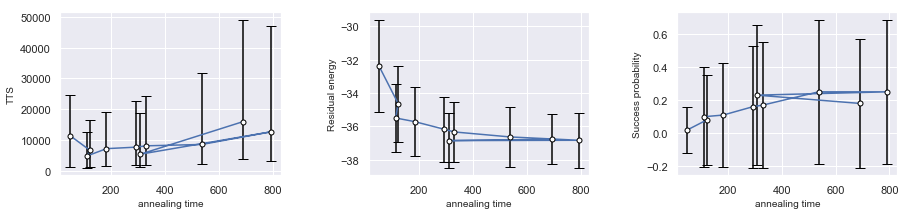

In [10]:
fig, (axL,axC,axR) = plt.subplots(ncols=3, figsize=(15,3))
plt.subplots_adjust(wspace=0.4)

fontsize = 10
axL.plot(result['time'], result['tts'])
axL.errorbar(result['time'], result['tts'], yerr = (result['se_lower_tts'],result['se_upper_tts']), capsize=5, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
axL.set_xlabel('annealing time', fontsize=fontsize)
axL.set_ylabel('TTS', fontsize=fontsize)

axC.plot(result['time'], result['residual_energy'])
axC.errorbar(result['time'], result['residual_energy'], yerr = result['se_residual_energy'], capsize=5, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
axC.set_xlabel('annealing time', fontsize=fontsize)
axC.set_ylabel('Residual energy', fontsize=fontsize)

axR.plot(result['time'], result['success_prob'])
axR.errorbar(result['time'], result['success_prob'], yerr = result['se_success_prob'], capsize=5, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
axR.set_xlabel('annealing time', fontsize=fontsize)
axR.set_ylabel('Success probability', fontsize=fontsize)

1回のアニーリング時間が延びると、成功確率と残留エネルギーについて標準誤差のエラーバーが短くなっていくことが確認できました。